## Section 1: Data Preprocessing

Kaggle Dataset Link: [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)


### Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### Upload and load the dataset

In [ ]:
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
#Read and display the dataset
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Initial insights into the dataset

In [ ]:
#Display the number of rows and columns
df.shape

(1338, 7)

In [ ]:
print("Number of Rows:" + format(df.shape[0]))
print("Number of Columns:" + format(df.shape[1]))

Number of Rows:1338
Number of Columns:7


In [ ]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Select numerical columns from the datset
df.select_dtypes(include = ['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
#Select caterogical columns from the datset
df.select_dtypes(include = 'object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
print(f"Count of columns with categorical datatype : ", len(df.select_dtypes(include = 'object').columns))
print(f"Count of columns with numerical datatype : ", len(df.select_dtypes(include = ['float64', 'int64']).columns))

Count of columns with categorical datatype :  3
Count of columns with numerical datatype :  4


In [ ]:
#Statistical Summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [ ]:
df.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [ ]:
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


### Dealing with missing values

In [ ]:
df.isna().values.any()

False

In [ ]:
df.isna().values.sum()

0

### Dealing with duplicated values

In [ ]:
#Checking for duplicated values within the dataset
df.duplicated().sum()

1

In [ ]:
#Dropping the duplicates
df.drop_duplicates(inplace = True)

In [ ]:
#Check for duplicates again - Verification
df.duplicated().sum()

0

### Encoding categorical columns



In [ ]:
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
#One Hot Encoding
df = pd.get_dummies(data = df, drop_first= True)

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
df.shape

(1337, 9)

### Correlation Matrix and Heatmap

In [ ]:
#Drop the dependent variable
newdf = df.drop(columns = 'charges')
newdf.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


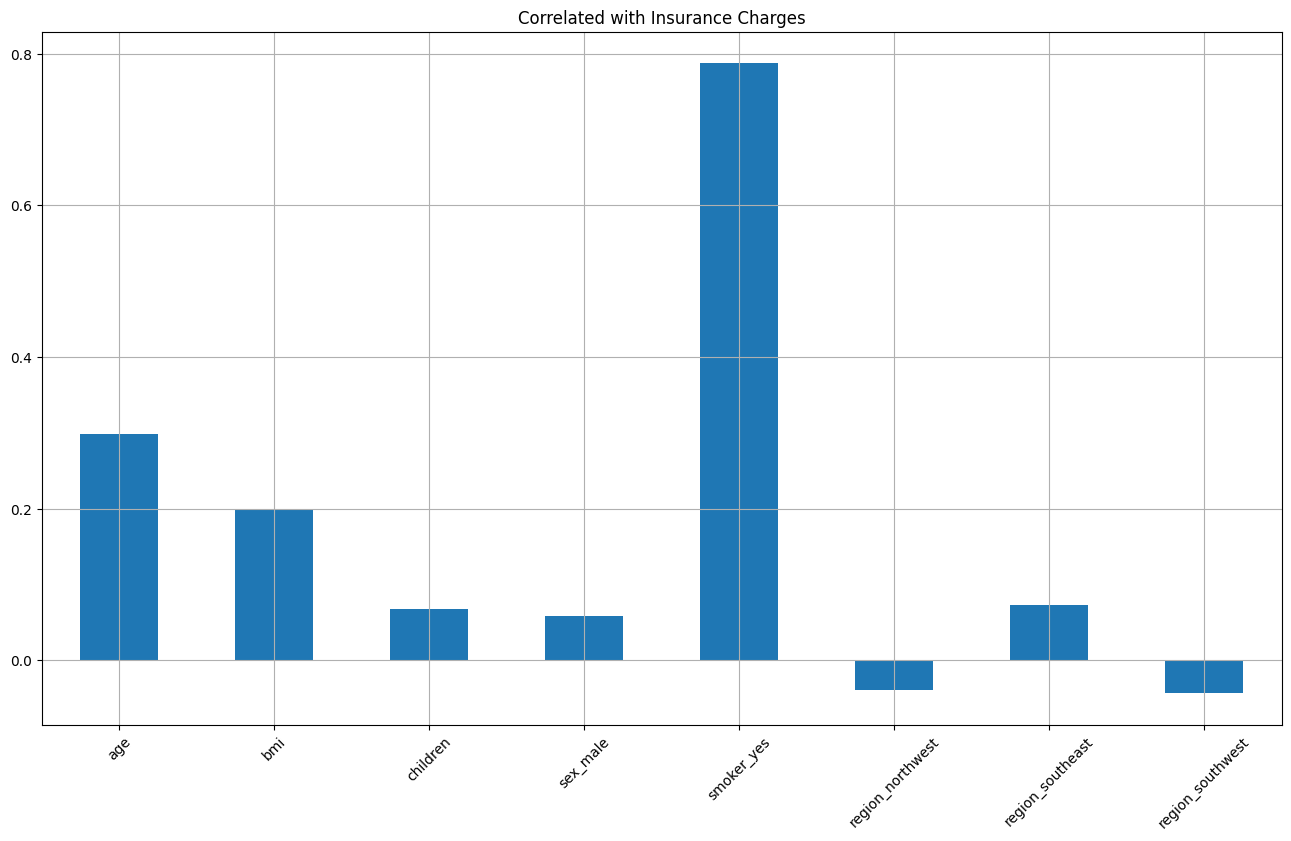

In [ ]:
newdf.corrwith(df['charges']).plot.bar(
    figsize = (16,9), title = 'Correlated with Insurance Charges', rot = 45, grid = True
)
plt.show()

In [ ]:
#Correlation Matrix
corr = df.corr()
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


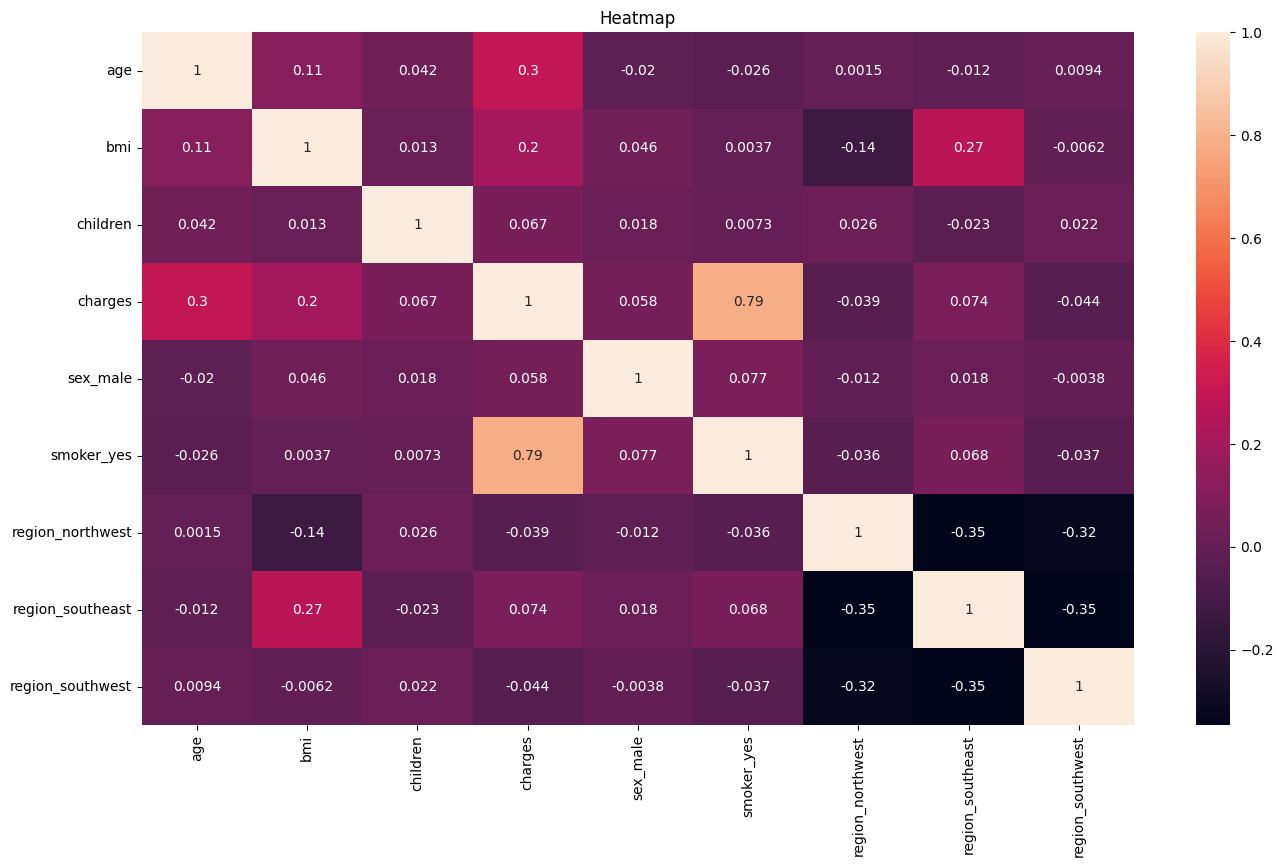

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot = True)
plt.title("Heatmap")
plt.show()

### Splitting dataset into train and test sets

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
#Matrix of features/independent variables
x = df.drop(columns = 'charges')
x.shape

(1337, 8)

In [ ]:
#Target variable/dependent variable
y = df['charges']
y.shape

(1337,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=0)

In [ ]:
x_train.shape

(1069, 8)

In [ ]:
x_test.shape

(268, 8)

In [ ]:
y_train.shape

(1069,)

In [ ]:
y_test.shape

(268,)

### Feature Scaling

In [ ]:
sc = StandardScaler()

In [ ]:
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [ ]:
scaled_x_train

array([[ 0.26227135, -1.76779252,  0.76684609, ..., -0.56834831,
        -0.60148436, -0.57843044],
       [-1.51041501,  0.60335531, -0.89763812, ..., -0.56834831,
         1.66255361, -0.57843044],
       [-1.15587773,  0.97258514,  0.76684609, ..., -0.56834831,
        -0.60148436, -0.57843044],
       ...,
       [-0.73043301,  1.07478268,  0.76684609, ..., -0.56834831,
         1.66255361, -0.57843044],
       [-1.43950755,  0.78467353, -0.89763812, ...,  1.75948442,
        -0.60148436, -0.57843044],
       [ 0.97134589, -0.71861936,  0.76684609, ..., -0.56834831,
        -0.60148436, -0.57843044]])

In [ ]:
scaled_x_test

array([[-1.51041501,  1.49181459, -0.89763812, ..., -0.56834831,
         1.66255361, -0.57843044],
       [ 0.54590117, -0.23070851, -0.06539601, ..., -0.56834831,
         1.66255361, -0.57843044],
       [ 0.68771608,  0.09566429, -0.06539601, ..., -0.56834831,
        -0.60148436, -0.57843044],
       ...,
       [-1.51041501, -0.75653135,  0.76684609, ..., -0.56834831,
         1.66255361, -0.57843044],
       [ 1.04225335, -0.93455288,  1.5990882 , ..., -0.56834831,
        -0.60148436,  1.72881635],
       [ 1.60951298, -0.04526942,  0.76684609, ...,  1.75948442,
        -0.60148436, -0.57843044]])

## Section 2: Model Building

In [ ]:
#Define a function which will give us the mean absolute error and root mean squared error
def modelresults(predictions):
  print("Mean absolute error on model is {}:".format(mean_absolute_error(y_test, predictions)))
  print("Root mean squared error on model is {}:".format(np.sqrt(mean_squared_error(y_test, predictions))))
  print("R2 Coefficient for model is {}:".format(r2_score(y_test, predictions)))

### 1) Multiple Linear Regression

In [ ]:
regressor_lr = LinearRegression()

In [ ]:
regressor_lr.fit(scaled_x_train,y_train)
y_pred = regressor_lr.predict(scaled_x_test)

In [ ]:
modelresults(y_pred)

Mean absolute error on model is 4396.031406695098:
Root mean squared error on model is 6445.635473781341:
R2 Coefficient for model is 0.7530385567240125:


### 2) Random Forest Regression

In [ ]:
regressor_rfr = RandomForestRegressor()
regressor_rfr.fit(scaled_x_train,y_train)
y_pred = regressor_rfr.predict(scaled_x_test)
modelresults(y_pred)

Mean absolute error on model is 2965.9157791642037:
Root mean squared error on model is 5199.334032091722:
R2 Coefficient for model is 0.8393084232219601:


### 3) XGBoost Regressor

In [ ]:
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(scaled_x_train,y_train)
y_pred = regressor_xgb.predict(scaled_x_test)
modelresults(y_pred)

Mean absolute error on model is 2880.5224947115494:
Root mean squared error on model is 5040.310269600171:
R2 Coefficient for model is 0.8489877369879542:


### 4) Support Vector Regression Model

In [ ]:
svrmodel = SVR(kernel = 'linear',C=1, gamma = 'scale', degree =2, )
svrmodel.fit(scaled_x_train, y_train)

SVR(C=1, degree=2, kernel='linear')

In [ ]:
y_pred = svrmodel.predict(scaled_x_test)
modelresults(y_pred)

Mean absolute error on model is 8650.160761562542:
Root mean squared error on model is 13205.108752836884:
R2 Coefficient for model is -0.03652943007481002:


The best performing model is XGB Regressor Model with the best R2 Score and also the least RMSE Score




## Section 3: Predicting Insurance Charges for sample customers

### Example 1: Frank

Name: Frank, Age: 40, Sex: 1, BMI: 45.50, Children: 4, Smoker: 1, Region: Northeast

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
frank_obs = [[ 40, 45.50, 4, 1, 1, 0, 0, 0]]
frank_obs

[[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [ ]:
y_pred = regressor_xgb.predict(sc.transform(frank_obs))
y_pred

array([43939.504], dtype=float32)

### Example 2: Mary

Name: Mary, Age: 19, Sex: 0, BMI: 27.90, Children: 0, Smoker: 0, Region: Northwest

In [ ]:
mary_obs = [[ 19, 27.90, 0, 0, 0, 1, 0, 0]]
mary_obs

[[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [ ]:
y_pred = regressor_xgb.predict(sc.transform(mary_obs))
y_pred

array([2514.806], dtype=float32)